In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import matplotlib.gridspec as gridspec
import networkx as nx

In [2]:
df = pd.read_csv('COVID tweets LIWCalike analysis - Sheet1.csv')
df['docname'] = [x.split('.')[0] for x in df['docname']]
df = df.set_index('docname')

In [3]:
df

,WC,care.virtue,care.vice,fairness.virtue,fairness.vice,loyalty.virtue,loyalty.vice,authority.virtue,authority.vice,sanctity.virtue,...,Home,Money,Relig,Death,Informal,Swear,Netspeak,Assent,Nonflu,Filler
docname,,,,,,,,,,,,,,,,,,,,,
MAGA_pre,"533,620",0.72205,0.56051,0.13080,0.092388,0.50073,0.014992,0.48668,0.08002,0.39523,...,0.42989,1.4960,0.3362,0.63416,0.9972,0.23575,0.4001,0.20202,0.19939,0.014617
MAGA_post,"4,509,392",0.58622,0.49404,0.19464,0.157693,0.43525,0.029339,0.57799,0.09518,0.44935,...,1.21575,1.5975,0.3827,0.55979,1.1545,0.36542,0.4378,0.21367,0.17816,0.019692
Left_pre,"323,730",0.97983,0.41362,0.09329,0.080932,0.42196,0.005869,0.35029,0.05591,0.38952,...,0.20789,1.6208,0.2857,0.53007,1.8037,0.57023,0.9066,0.21994,0.16372,0.032743
Left_post,"1,882,664",0.66810,0.39917,0.12557,0.104798,0.54933,0.009508,0.47523,0.05062,0.50407,...,0.48176,1.2008,0.4388,0.50460,1.6190,0.48410,0.8260,0.18182,0.15558,0.027302
Health_pre,"998,118",1.58659,0.44013,0.09959,0.079349,0.49092,0.004108,0.53310,0.02795,0.23224,...,0.18274,0.7642,0.1561,0.44253,0.7292,0.11983,0.3329,0.15419,0.14407,0.008416
Health_post,"2,433,178",1.19301,0.36319,0.09625,0.055730,0.78408,0.004603,0.48352,0.03029,0.52027,...,0.21622,0.8509,0.1663,0.41205,0.7194,0.15042,0.2726,0.14832,0.16365,0.011549
Dems_pre,"1,118,195",0.97568,0.43901,0.08970,0.132088,0.44160,0.010374,0.45851,0.05142,0.30102,...,0.20649,1.5173,0.2142,0.54177,1.1384,0.41800,0.3782,0.17385,0.17618,0.016902
Dems_post,"4,252,800",0.77241,0.35374,0.11512,0.101698,0.60744,0.009147,0.49513,0.05810,0.36061,...,0.29588,1.0660,0.2229,0.45876,0.9823,0.31904,0.3441,0.15524,0.17233,0.014249
Antivax_pre,"1,394,630",1.34545,0.91903,0.28430,0.166639,0.48486,0.008891,0.56051,0.05894,0.52695,...,0.22651,1.1366,0.4741,0.62404,0.9027,0.12971,0.4907,0.15466,0.13437,0.009537


In [4]:
info = [('Dems','Democrats','b'),
        ('Health','Public Health','y'),('Left','Unorthodox','g'),('MAGA','Republicans','r'),('Antivax','Antivaxxers','k')]

target_list = [ 'Posemo',  'Anx', 'Anger',
                    'Sad', 'Family', 'Friend', 'Female', 'Male', 'Insight',
                    'Cause', 'Discrep', 'Tentat', 'Certain', 'Differ', 'See', 'Hear', 
                    'Feel', 'Body', 'Health', 'Sexual', 'Ingest',  'Affiliation',
                    'Achieve', 'Power', 'Reward', 'Risk', 'FocusPast', 'FocusPresent', 'FocusFuture',
                     'Motion', 'Space', 'Time', 'Work', 'Leisure', 'Home', 'Money', 'Relig',
                    'Death']


target_change_dict = defaultdict(list)
for i,(ix,label,color) in enumerate(info):

   
    for x,target in enumerate(target_list):
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        target_change_dict[target].append(np.abs(postval-preval))

In [5]:
sorted_changes = []
for target in target_change_dict:
    z = np.abs(max(target_change_dict[target]) - min(target_change_dict[target])) #trying to find discrepancies
    sorted_changes.append((z,target))
    
sorted_changes = sorted(sorted_changes,reverse=True)

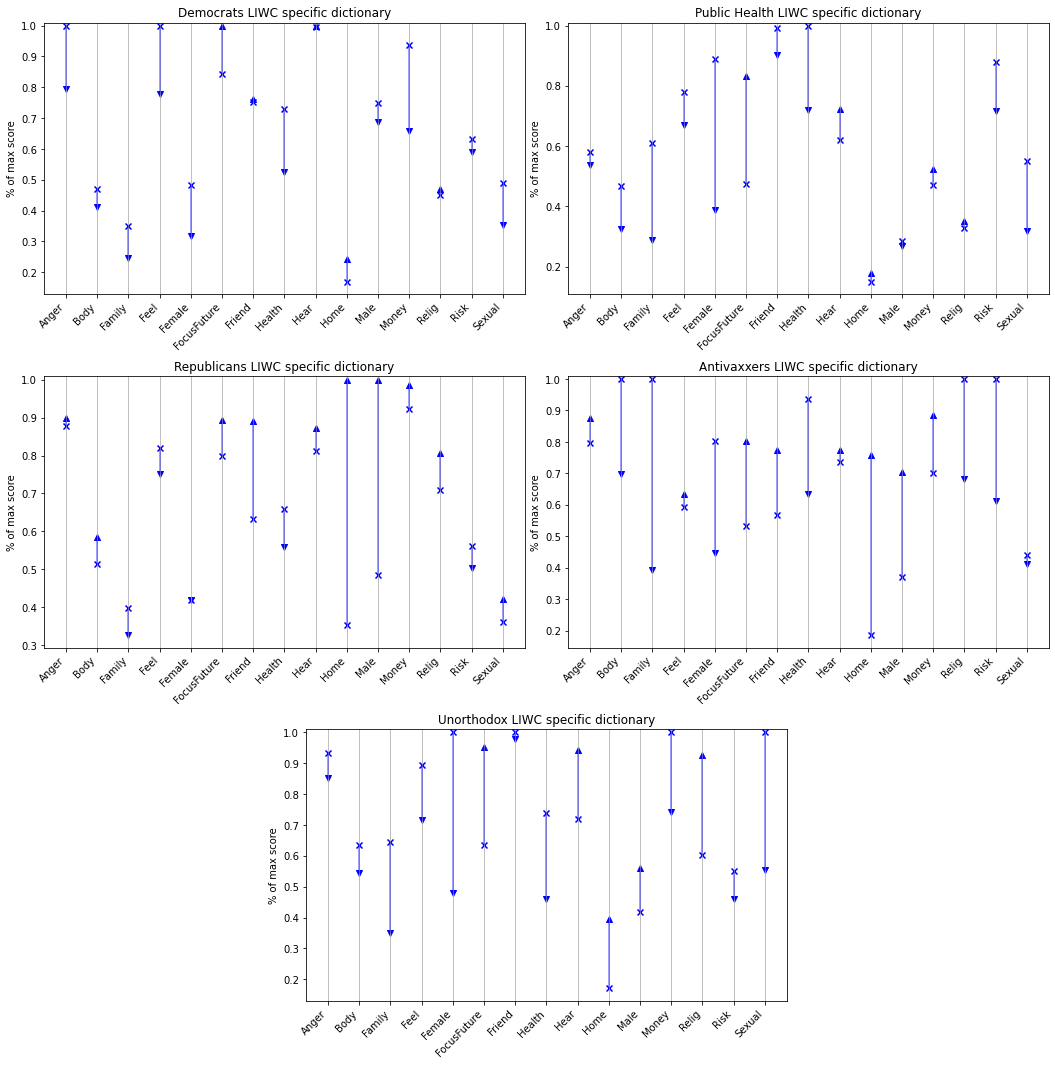

In [6]:
info = [('Dems','Democrats','b'),
        ('Health','Public Health','y'),('MAGA','Republicans','r'),('Antivax','Antivaxxers','k'),('Left','Unorthodox','g')]

target_list = sorted([b for a,b in sorted_changes[0:15]])

fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(3, 4)

ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,0:2])
ax4 = plt.subplot(gs[1,2:])
ax5 = plt.subplot(gs[2,1:3])
axlist = [ax1,ax2,ax3,ax4,ax5]


for i,(ix,label,color) in enumerate(info):

    ax = axlist[i]
    ax.set_title(label+' LIWC specific dictionary')
    for x,target in enumerate(target_list):
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')


    
    
plt.subplots_adjust(hspace=0.3)
plt.show()

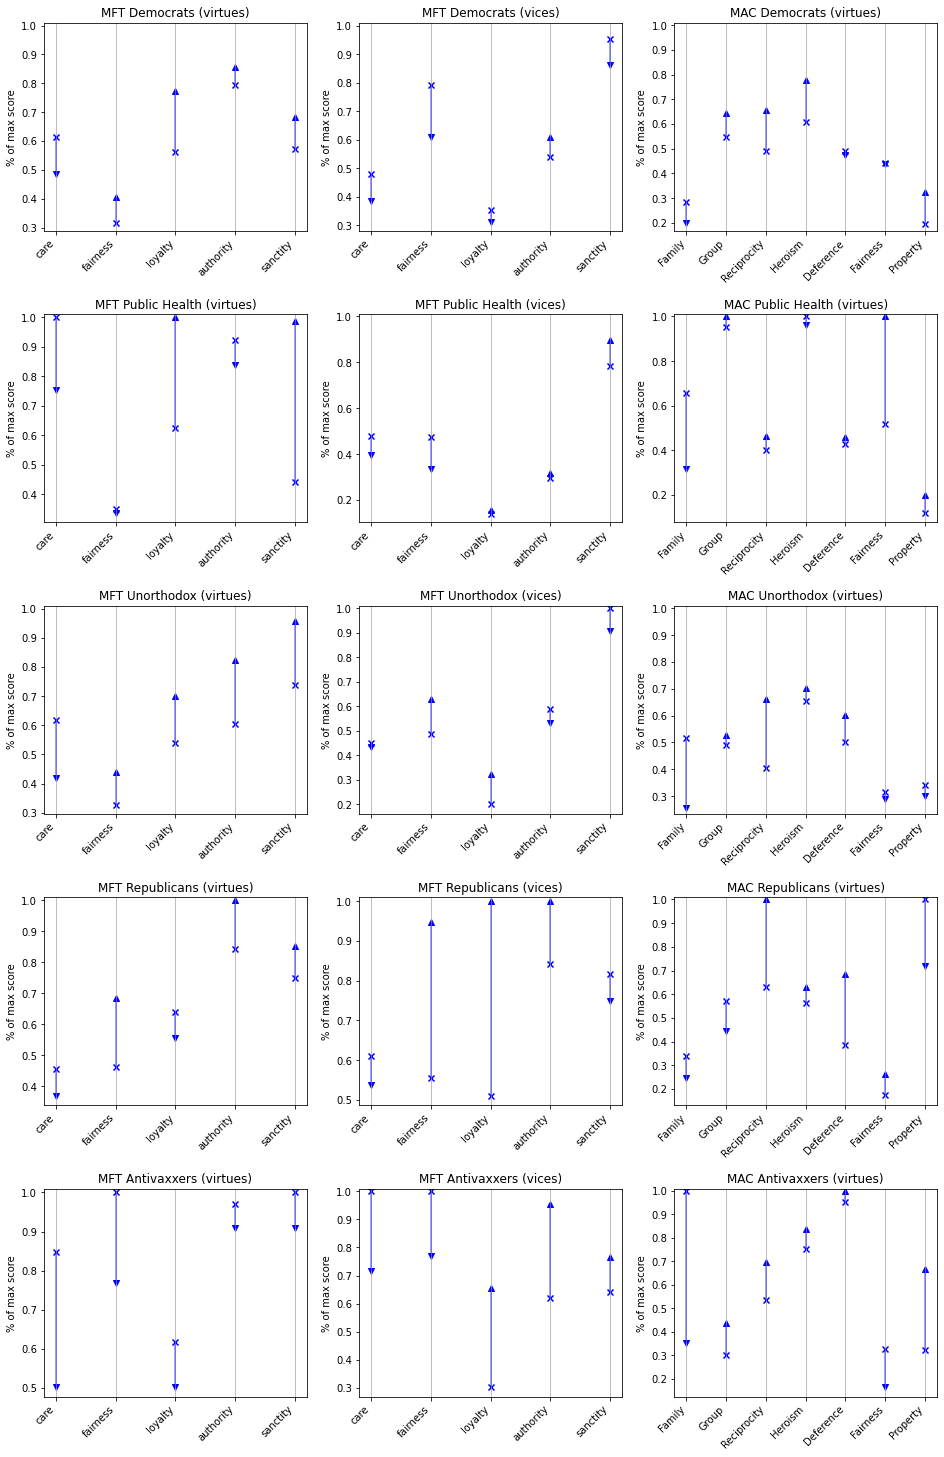

In [7]:
#try percent of max score 

info = [('Dems','Democrats','b'),
        ('Health','Public Health','y'),('Left','Unorthodox','g'),('MAGA','Republicans','r'),('Antivax','Antivaxxers','k')]

mft_target_list = ['care', 'fairness','loyalty', 'authority', 'sanctity']

mac_target_list = ['Family', 'Group','Reciprocity', 'Heroism', 'Deference', 'Fairness','Property']

fig = plt.figure(figsize=(16,36))

target_list = mft_target_list
for i,(ix,label,color) in enumerate(info):

    ax = fig.add_subplot(7,3,(i*3)+1)
    ax.set_title('MFT '+label+' (virtues)')
    for x,target in enumerate(target_list):
        target += '.virtue'
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

    ax = fig.add_subplot(7,3,(i*3)+2)
    ax.set_title('MFT '+label+' (vices)')
    for x,target in enumerate(target_list):
        target += '.vice'
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

target_list = mac_target_list

for i,(ix,label,color) in enumerate(info):

    ax = fig.add_subplot(7,3,(i*3)+3)
    ax.set_title('MAC '+label+' (virtues)')
    for x,target in enumerate(target_list):
        target = 'Virtue'+target
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

    
    
plt.subplots_adjust(hspace=0.4)
plt.show()

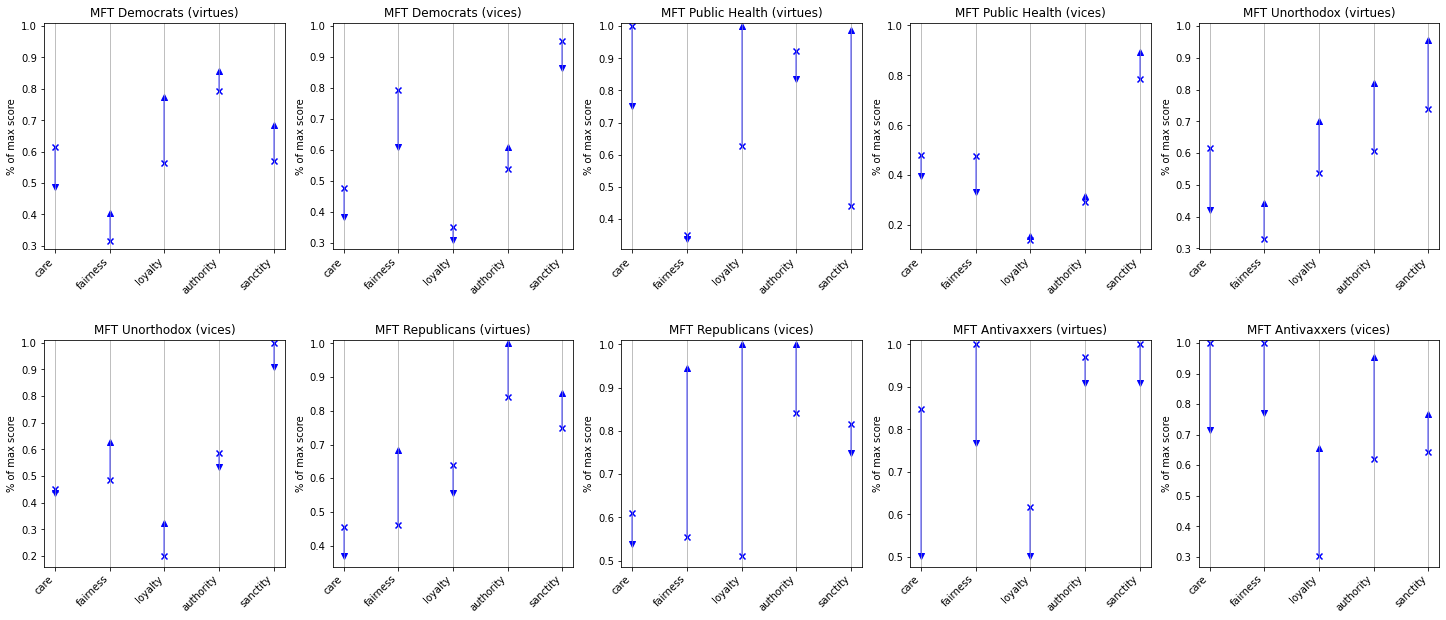

In [13]:
#try percent of max score 

info = [('Dems','Democrats','b'),
        ('Health','Public Health','y'),('Left','Unorthodox','g'),('MAGA','Republicans','r'),('Antivax','Antivaxxers','k')]

mft_target_list = ['care', 'fairness','loyalty', 'authority', 'sanctity']

mac_target_list = ['Family', 'Group','Reciprocity', 'Heroism', 'Deference', 'Fairness','Property']

fig = plt.figure(figsize=(25,10))

target_list = mft_target_list
for i,(ix,label,color) in enumerate(info):

    ax = fig.add_subplot(2,5,(i*2)+1)
    ax.set_title('MFT '+label+' (virtues)')
    for x,target in enumerate(target_list):
        target += '.virtue'
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

    ax = fig.add_subplot(2,5,(i*2)+2)
    ax.set_title('MFT '+label+' (vices)')
    for x,target in enumerate(target_list):
        target += '.vice'
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

   
plt.subplots_adjust(hspace=0.4)
plt.show()

<ipython-input-26-52baad5109a0>:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(4.5,5,(i+1))


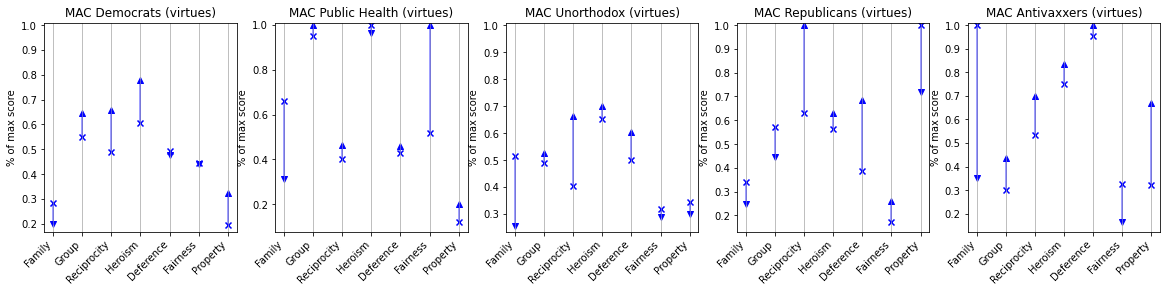

In [26]:
#try percent of max score 

info = [('Dems','Democrats','b'),
        ('Health','Public Health','y'),('Left','Unorthodox','g'),('MAGA','Republicans','r'),('Antivax','Antivaxxers','k')]

mft_target_list = ['care', 'fairness','loyalty', 'authority', 'sanctity']

mac_target_list = ['Family', 'Group','Reciprocity', 'Heroism', 'Deference', 'Fairness','Property']

fig = plt.figure(figsize=(20,20))

target_list = mac_target_list

for i,(ix,label,color) in enumerate(info):

    ax = fig.add_subplot(4.5,5,(i+1))
    ax.set_title('MAC '+label+' (virtues)')
    for x,target in enumerate(target_list):
        target = 'Virtue'+target
        maxscore = np.max(df[target])
        preval = df.loc[ix+'_pre'][target]/maxscore
        postval = df.loc[ix+'_post'][target]/maxscore
        
        tomarker = 'v'
        if preval<postval:
            tomarker = '^'
        

        ax.scatter(x,preval,marker='x',c='b')
        ax.scatter(x,postval,marker=tomarker,c='b')
        ax.plot([x,x],[preval,postval],c='b',alpha=0.5)
    ax.set_xticks(range(len(target_list)))
    ax.set_xticklabels(target_list,rotation=45,ha='right')
    ax.set_ylim(top=1.01)
    ax.xaxis.grid(True)
    


    ax.set_ylabel('% of max score')

    
    
plt.subplots_adjust(hspace=0.4)
plt.show()